In [2]:
from rdkit import Chem
from rdsl import (get_all_functional_group_patterns, get_functional_group_matches, select_atom_ids, select_molecule, highlight_atoms)

mol = Chem.MolFromSmiles("N1C=C(F)C=C1C1=CC2NCCC(C(=O)[O-])C=2C=C1")

### Selection language
#### Pharmacophores
Uses the RDKit base features `Path(RDConfig.RDDataDir) / "BaseFeatures.fdef")` to select common pharmacophores

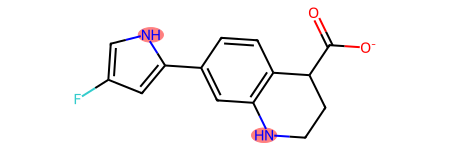

In [3]:
atom_ids = select_atom_ids(mol, "donors")
mol

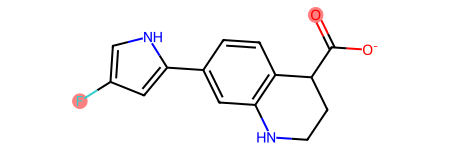

In [4]:
atom_ids = select_atom_ids(mol, "acceptors")
mol

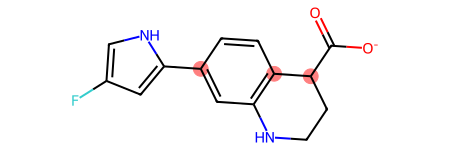

In [5]:
atom_ids = select_atom_ids(mol, "hydrophobes")
mol

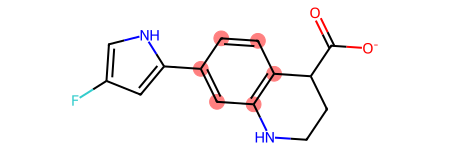

In [6]:
atom_ids = select_atom_ids(mol, "lumped_hydrophobes")
mol

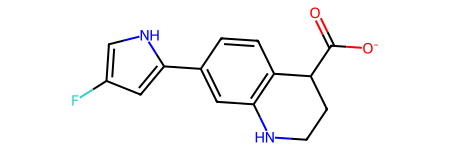

In [7]:
atom_ids = select_atom_ids(mol, "pos_ionizable")
mol

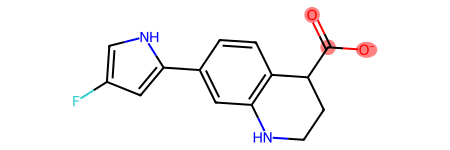

In [8]:
atom_ids = select_atom_ids(mol, "neg_ionizable")
mol

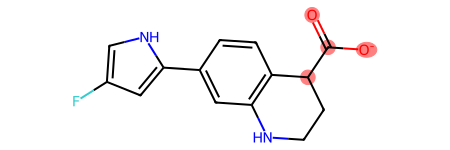

In [9]:
atom_ids = select_atom_ids(mol, "zn_binders")
mol

#### Substructure Alerts
Uses PAINS, BMS and Glaxo libraries to highlight known problematic substructures

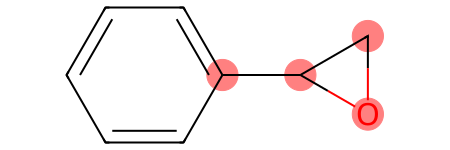

In [10]:
_mol = Chem.MolFromSmiles("c1ccccc1C1CO1")
atom_ids = select_atom_ids(_mol, "alerts")
_mol

#### Entity expansion


`byring S1` Expands S1 to the largest ring it's part of

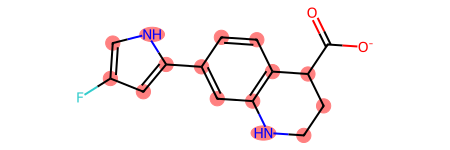

In [11]:
atom_ids = select_atom_ids(mol, "byring (elem N)")
mol

`byfunctional S1` Expands S1 to the largest functional group it's part of. Uses the 40k SMARTS from [SMARTS Chemist](https://chemist.smarts.plus/).

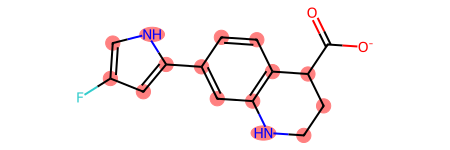

In [12]:
# The 4 donors expand to the full piperazine, carboxamide, secondary amine and carboxylic acid
atom_ids = select_atom_ids(mol, "byfunctional donors")
mol

`bymolecule S1` Expands S1 to complete molecules (connected with bonds)

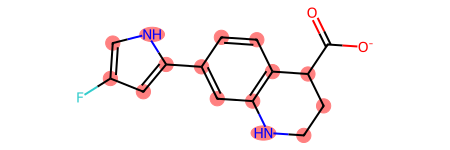

In [13]:
mol0 = Chem.MolFromSmiles("c1c(Nc2ncccn2)cccc1.[nH]1cccc1")
atom_ids = select_atom_ids(mol0, "bymolecule ringsize 5")
mol

`byresidue S1` Expands S1 to complete residues (using the residue name in PDB files)

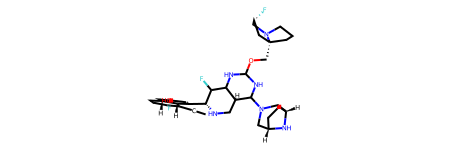

In [14]:
# !wget https://files.rcsb.org/download/7RPZ.pdb -O /tmp/7RPZ.pdb > /dev/null 2>&1
cocomplex = Chem.MolFromPDBFile("tests/data/7rpz.pdb")
result = select_molecule(cocomplex, "byres elem F")
result.mol

#### Atom properties


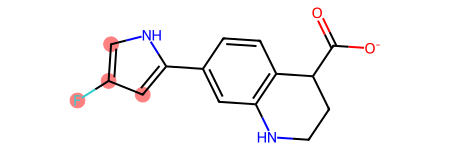

In [15]:
atom_ids = select_atom_ids(mol, "index 1-4")
mol

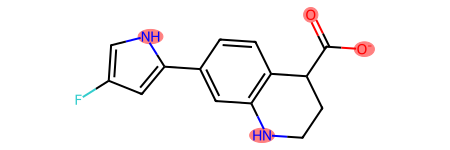

In [16]:
atom_ids = select_atom_ids(mol, "elem O+N")  # same `as elem O or elem N`
mol

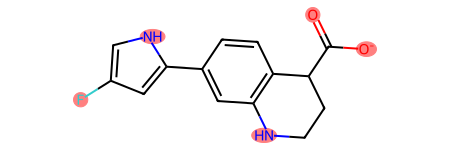

In [17]:
atom_ids = select_atom_ids(mol, "not atomic_number 6")
mol

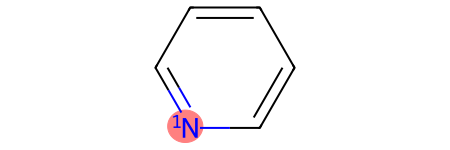

In [18]:
_mol = Chem.MolFromSmiles("c1cnccc1")
for atom in _mol.GetAtoms():
    if atom.GetSymbol() == "N":
        atom.SetIsotope(1)
atom_ids = select_atom_ids(_mol, "isotope 1")  # By default all atoms have an isotope of 0
_mol

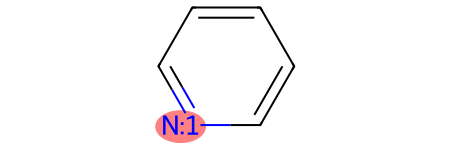

In [19]:
_mol = Chem.MolFromSmiles("c1cnccc1")
for atom in _mol.GetAtoms():
    if atom.GetSymbol() == "N":
        atom.SetAtomMapNum(1)
atom_ids = select_atom_ids(_mol, "not atom_map_number 0")  # By default all atoms have an atom map number of 0
_mol

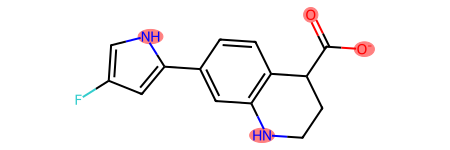

In [20]:
# Uses MMFF
atom_ids = select_atom_ids(mol, "partial_charge < -0.3")
mol

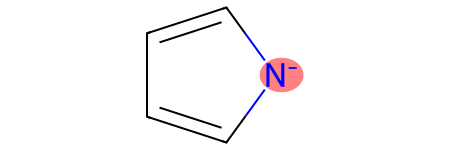

In [21]:
mol1 = Chem.MolFromSmiles("[n-]1cccc1")
atom_ids = select_atom_ids(mol1, "formal_charge <= -1")
mol1

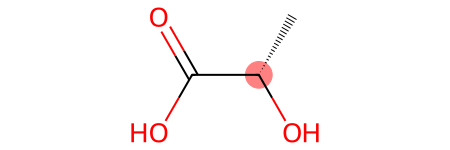

In [22]:
mol2 = Chem.MolFromSmiles("C[C@H](O)C(=O)O")
atom_ids = select_atom_ids(mol2, "stereo S")
mol2

In [23]:
mol2 = Chem.MolFromSmiles("C[C@@H](O)C(=O)O")
atom_ids = select_atom_ids(mol2, "stereo R")
mol2

In [24]:
atom_ids = select_atom_ids(mol, "ring and aromatic")
mol

In [25]:
mol3 = Chem.MolFromSmiles("N1C=CC=C1C1=CC2CCCCC=2C=C1")
atom_ids = select_atom_ids(mol3, "aliphatic or (aromatic and ringsize 5)")
mol3

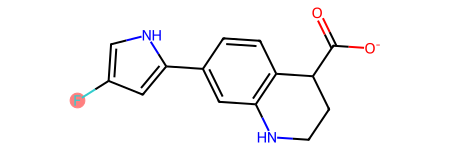

In [26]:
atom_ids = select_atom_ids(mol, "mass > 16")
mol

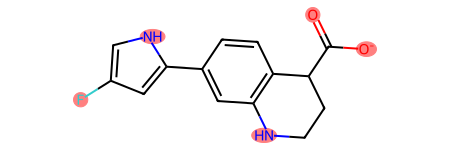

In [27]:
atom_ids = select_atom_ids(mol, "valence <4")
mol

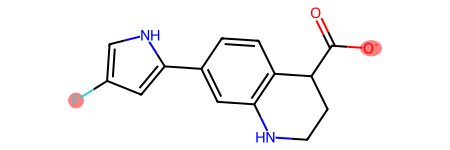

In [28]:
atom_ids = select_atom_ids(mol, "explicit_valence 1")
mol

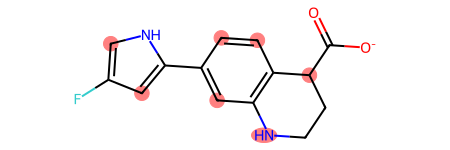

In [29]:
atom_ids = select_atom_ids(mol, "implicit_valence 1")
mol

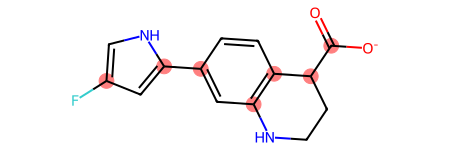

In [30]:
atom_ids = select_atom_ids(mol, "degree 3")
mol

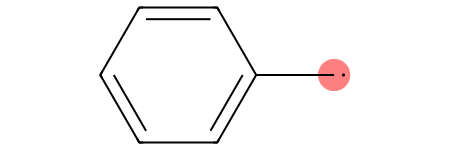

In [31]:
_mol = Chem.MolFromSmiles("[CH2]c1ccccc1")
atom_ids = select_atom_ids(_mol, "radical_electrons 1")
_mol

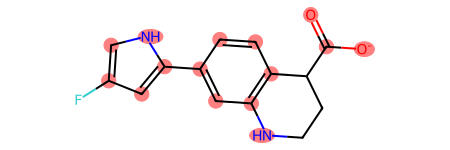

In [32]:
# One of OTHER, S, SP, SP2, SP2D, SP3, SP3D, SP3D2, UNSPECIFIED
atom_ids = select_atom_ids(mol, "hybridization SP2")
mol

#### PDB properties

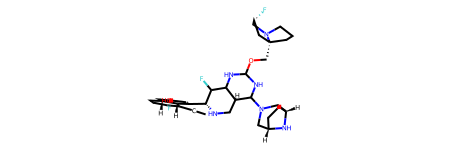

In [33]:
# Select by residue name
result = select_molecule(cocomplex, "resn 6IC")
result.mol

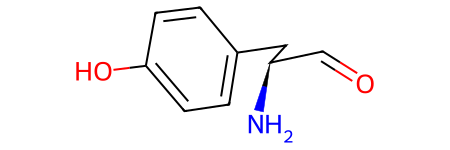

In [34]:
result = select_molecule(cocomplex, "resi 4")
result.mol

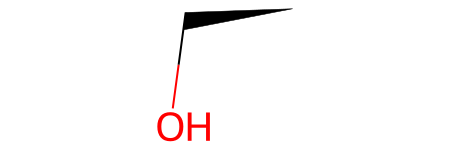

In [35]:
result = select_molecule(cocomplex, "alt A")
result.mol

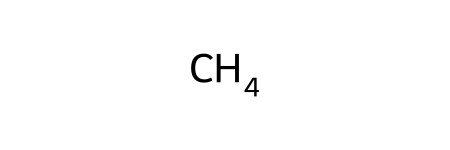

In [36]:
# Grab the C-alpha of tyrosine with residue number 4
result = select_molecule(cocomplex, "name CA and resi 4 and resn TYR")
result.mol

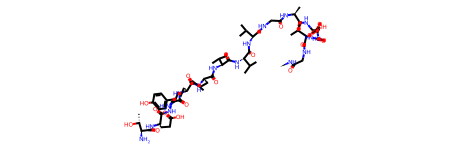

In [37]:
# Use the PDB atom id *not* the internal RDKit index
result = select_molecule(cocomplex, "id 1-100")
result.mol

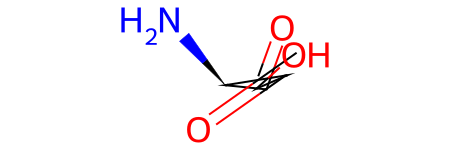

In [38]:
# Get residue G12 chain A
result = select_molecule(cocomplex, "chain A and resn ASP and resi 12")
result.mol

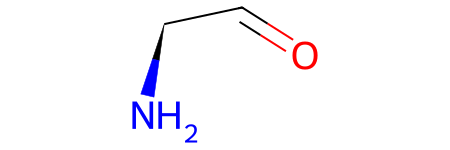

In [39]:
# Get backbone of residue ATYR4
result = select_molecule(cocomplex, "backbone and chain A and resn TYR and resi 4")
result.mol

In [40]:
# Get sidechain of residue ATYR4
result = select_molecule(cocomplex, "sidechain and chain A and resn TYR and resi 4")
result.mol

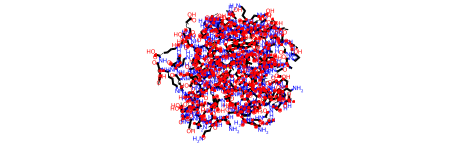

In [41]:
result = select_molecule(cocomplex, "protein")
result.mol

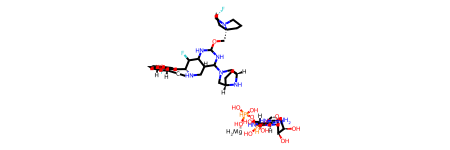

In [42]:
# residue 6IC (inhibitor) and ATP (with Mg bound covalently)
result = select_molecule(cocomplex, "hetatm and not solvent")
result.mol

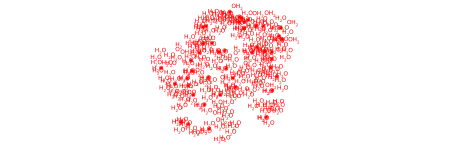

In [43]:
result = select_molecule(cocomplex, "solvent")
result.mol

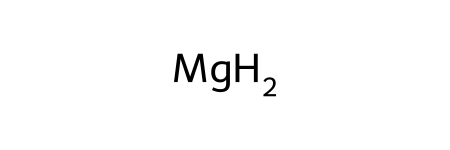

In [44]:
# Select the Mg in the ATP pocket
result = select_molecule(cocomplex, "metals")
result.mol

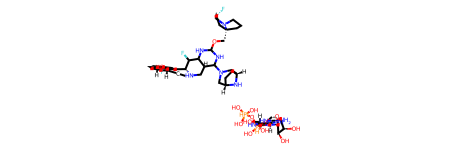

In [45]:
result = select_molecule(cocomplex, "organic")
result.mol

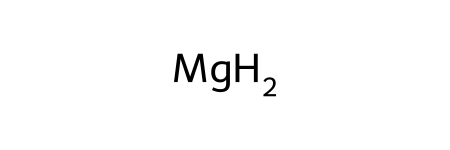

In [46]:
result = select_molecule(cocomplex, "inorganic")
result.mol

[17:57:01] Explicit valence for atom # 31 O, 3, is greater than permitted
2026-02-28 17:57:01.355 | DEBUG    | rdsl.select.core:select_molecule:177 - Sanitization produced warnings for subset molecule


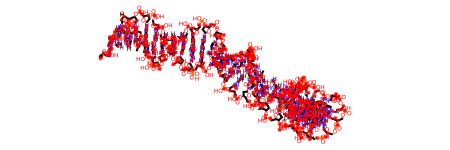

In [47]:
!wget https://files.rcsb.org/download/1CGP.pdb -O /tmp/1CGP.pdb > /dev/null 2>&1
dna = Chem.MolFromPDBFile("/tmp/1CGP.pdb", sanitize=False)
result = select_molecule(dna, "nucleic")
result.mol

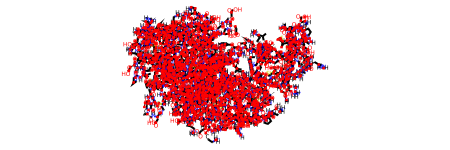

In [48]:
result = select_molecule(dna, "protein")
result.mol

In [49]:
# Atoms with b-factors over 99
result = select_molecule(dna, "b > 99")
result.mol

[17:57:02] Explicit valence for atom # 170 O, 3, is greater than permitted
2026-02-28 17:57:02.779 | DEBUG    | rdsl.select.core:select_molecule:177 - Sanitization produced warnings for subset molecule


[17:57:03] Explicit valence for atom # 170 O, 3, is greater than permitted
2026-02-28 17:57:03.318 | DEBUG    | rdsl.select.core:select_molecule:177 - Sanitization produced warnings for subset molecule


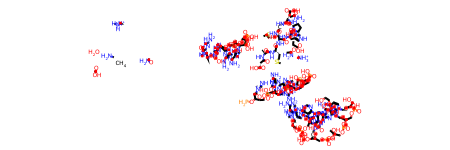

In [50]:
# Atoms with b-factors over 99
result = select_molecule(dna, "b > 99")
result.mol

[17:57:03] Explicit valence for atom # 31 O, 3, is greater than permitted
2026-02-28 17:57:03.585 | DEBUG    | rdsl.select.core:select_molecule:177 - Sanitization produced warnings for subset molecule


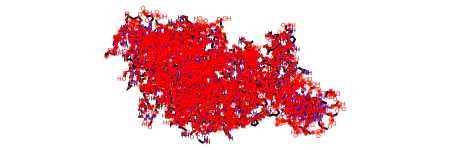

In [51]:
# Atoms with occupancy equal to 1
result = select_molecule(dna, "q 1")
result.mol

#### Bond expansion

`S1 extend 2` Expands S1 by 2 bonds connected to atoms in S1.

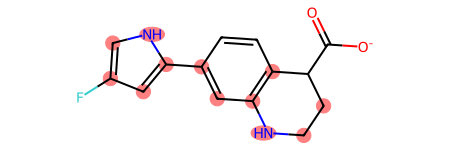

In [52]:
atom_ids = select_atom_ids(mol, "elem N extend 2")
mol

`bound_to S1` Atoms directly bonded to S1 including S1. Same as `S1 extend 1`.

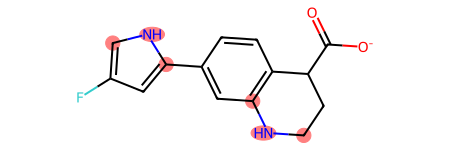

In [53]:
atom_ids = select_atom_ids(mol, "bound_to elem N")
mol

`neighbor S1` Atoms directly bonded to S1 excluding S1.

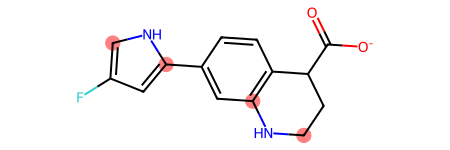

In [54]:
atom_ids = select_atom_ids(mol, "neighbor elem N")
mol

#### Proximity

`S1 within 5 of S2` Atoms in S1 that are within 5 Angstroms of any atom in
S2

In [55]:
select_molecule(cocomplex, "sidechain within 5 of resn 6IC")

[17:57:04] non-ring atom 17 marked aromatic
2026-02-28 17:57:04.799 | DEBUG    | rdsl.select.core:select_molecule:177 - Sanitization produced warnings for subset molecule


SelectionResult(mol=<rdkit.Chem.rdchem.Mol object at 0x1520bbdf0>, atom_mapping={0: 63, 1: 64, 2: 65, 3: 79, 4: 80, 5: 81, 6: 82, 7: 106, 8: 435, 9: 436, 10: 437, 11: 460, 12: 461, 13: 462, 14: 463, 15: 464, 16: 478, 17: 479, 18: 481, 19: 482, 20: 483, 21: 484, 22: 485, 23: 509, 24: 510, 25: 511, 26: 512, 27: 513, 28: 514, 29: 515, 30: 520, 31: 521, 32: 522, 33: 523, 34: 549, 35: 550, 36: 551, 37: 552, 38: 595, 39: 597, 40: 677, 41: 708, 42: 709, 43: 710, 44: 711, 45: 734, 46: 735, 47: 736, 48: 737, 49: 738, 50: 739, 51: 744, 52: 745, 53: 746, 54: 748, 55: 749, 56: 750, 57: 751, 58: 776, 59: 777, 60: 778, 61: 779, 62: 785, 63: 786, 64: 788, 65: 806, 66: 808, 67: 813, 68: 814, 69: 815}, bond_mapping={0: 151, 1: 152, 2: 167, 3: 168, 4: 169, 5: 528, 6: 529, 7: 553, 8: 554, 9: 555, 10: 556, 11: 571, 12: 573, 13: 575, 14: 576, 15: 577, 16: 578, 17: 603, 18: 604, 19: 605, 20: 606, 21: 607, 22: 608, 23: 614, 24: 615, 25: 616, 26: 644, 27: 645, 28: 646, 29: 691, 30: 806, 31: 807, 32: 808, 33: 

In [56]:
# Get full residues within 5Ang of the ligand
select_molecule(cocomplex, "byres sidechain within 5 of resn 6IC")

[17:57:04] non-ring atom 40 marked aromatic
2026-02-28 17:57:04.913 | DEBUG    | rdsl.select.core:select_molecule:177 - Sanitization produced warnings for subset molecule


SelectionResult(mol=<rdkit.Chem.rdchem.Mol object at 0x1548ec200>, atom_mapping={0: 60, 1: 63, 2: 64, 3: 65, 4: 70, 5: 71, 6: 72, 7: 75, 8: 76, 9: 79, 10: 80, 11: 81, 12: 82, 13: 106, 14: 435, 15: 436, 16: 437, 17: 438, 18: 439, 19: 440, 20: 441, 21: 448, 22: 449, 23: 450, 24: 456, 25: 457, 26: 458, 27: 460, 28: 461, 29: 462, 30: 463, 31: 464, 32: 465, 33: 467, 34: 468, 35: 474, 36: 475, 37: 476, 38: 477, 39: 478, 40: 479, 41: 481, 42: 482, 43: 483, 44: 484, 45: 485, 46: 486, 47: 489, 48: 506, 49: 507, 50: 508, 51: 509, 52: 510, 53: 511, 54: 512, 55: 513, 56: 514, 57: 515, 58: 516, 59: 517, 60: 520, 61: 521, 62: 522, 63: 523, 64: 549, 65: 550, 66: 551, 67: 552, 68: 595, 69: 597, 70: 677, 71: 708, 72: 709, 73: 710, 74: 711, 75: 734, 76: 735, 77: 736, 78: 737, 79: 738, 80: 739, 81: 741, 82: 742, 83: 743, 84: 744, 85: 745, 86: 746, 87: 748, 88: 749, 89: 750, 90: 751, 91: 773, 92: 774, 93: 775, 94: 776, 95: 777, 96: 778, 97: 779, 98: 781, 99: 782, 100: 785, 101: 786, 102: 788, 103: 806, 10

`S1 around 5` Atoms with centers within 5 Angstroms of the center of
any atom in S1

[17:57:04] non-ring atom 46 marked aromatic
2026-02-28 17:57:04.990 | DEBUG    | rdsl.select.core:select_molecule:177 - Sanitization produced warnings for subset molecule


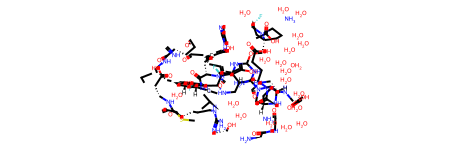

In [57]:
# Includes the ligand, any waters and any atoms with 5Ang of the ligand
select_molecule(cocomplex, "resn 6IC around 5").mol

`S1 beyond 12.3 of S2` Atoms in S1 that are at least 12.3 Anstroms away from S2

[17:57:05] non-ring atom 13 marked aromatic
2026-02-28 17:57:05.088 | DEBUG    | rdsl.select.core:select_molecule:177 - Sanitization produced warnings for subset molecule


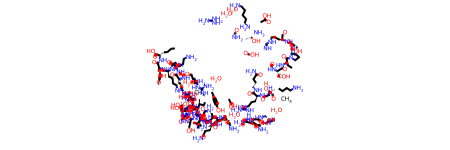

In [58]:
# Just the outside of the protein, far from the ligand
select_molecule(cocomplex, "protein beyond 30 of resn 6IC").mol

#### SMARTS

`S1 beyond 12.3 of S2` Atoms in S1 that are at least 12.3 Anstroms away from S2

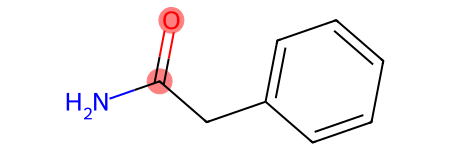

In [59]:
_mol = Chem.MolFromSmiles("NC(=O)Cc1ccccc1")
select_atom_ids(_mol, 'smarts " [C,N;R0]=O"')
_mol

#### Functional groups

`get_functional_group_matches` Get a description of all hierarchical functional groups in a molecule

        name                        atom_ids                 smarts   group  \
0    azecine  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)      C1=CC=CC=NC=CC=C1  cyclic   
1  quinoline  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)  C1=CC=C2C(=C1)C=CC=N2  cyclic   

  pattern_type  
0       smiles  
1       smiles  


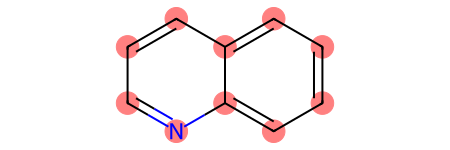

In [60]:
# This uses the sensationally useful list of 40000 SMARTS from https://chemist.smarts.plus/
_mol = Chem.MolFromSmiles("N1=CC=CC2=CC=CC=C12")
df = get_functional_group_matches(_mol, include_overshadowed=False)
print(df.head(10))
row = df.iloc[0]
# Highlight by atom IDs
highlight_atoms(_mol, atom_ids=row.atom_ids)

`Functional` select any other the above functional groups

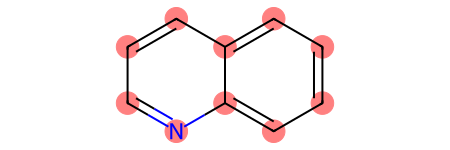

In [61]:
select_atom_ids(_mol, "functional azecine")
_mol

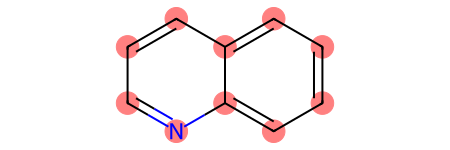

In [62]:
select_atom_ids(_mol, "functional pyridine+benzene")
_mol

In [63]:
df = get_functional_group_matches(mol, include_overshadowed=False)
df.head(5)

name                              atom_ids  \
0              carboxylic acid                          (13, 14, 15)   
1                     fluorine                                  (3,)   
2  1,2,3,4-tetrahydroquinoline  (6, 7, 8, 9, 10, 11, 12, 16, 17, 18)   
3                      pyrrole                       (0, 1, 2, 4, 5)   

              smarts             group pattern_type  
0   [CX3](=O)[O-,OH]  functional_group       smarts  
1              [FX1]  functional_group       smarts  
2  C1CC2=CC=CC=C2NC1            cyclic       smiles  
3          C1=CNC=C1            cyclic       smiles

In [64]:
# Anything starting with a number will require quotes around the functional group name
select_atom_ids(mol, "functional '1,2,3,4-tetrahydroquinoline'")
mol

In [65]:
# All functional group patterns can be found here

# WARNING: These SMARTS patterns are taken from
# https://github.com/torbengutermuth/SmartChemist/blob/main/smarts/License_for_patterns_here
# These patterns have a Creative Commons Attribution-NoDerivatives 4.0 International Public License
# If you use these patterns in your own code, remember to credit them!
# Do NOT modify the patterns without permission!

patterns_df = get_all_functional_group_patterns()
patterns_df

name                                            smarts  \
0           1,2-dialdehyde              O=[#6H1X3$(*[#6])][#6H1X3$(*[#6])]=O   
1       1,2-diketoaldehyde        O=[#6X3H0$(*([#6])[#6])][#6H1X3$(*[#6])]=O   
2             1,2-diketone  O=[#6X3H0$(*([#6])[#6])][#6X3H0$(*([#6])[#6])]=O   
3           1,3-dialdehyde             O=[#6H1X3$(*[#6])]*[#6H1X3$(*[#6])]=O   
4       1,3-diketoaldehyde                 O=[#6X3H0$(*([#6])[#6])]*[#6H1]=O   
...                    ...                                               ...   
40959               valine                      C[C!R](C)C([C$(*-[N,O])]=O)N   
40960             m-cresol                                  [CH3]c1cc(O)ccc1   
40961             o-cresol                                  [CH3]c1c(O)cccc1   
40962             p-cresol                                  [CH3]c1ccc(O)cc1   
40963  α-ketoglutaric acid                               O=C(O)C(=O)CCC(=O)O   

                  group pattern_type  \
0      functional_group       smarts   
1      functional_group       smarts   
2      functional_group       smarts   
3      functional_group       smarts   
4      functional_group       smarts   
...                 ...          ...   
40959        biological       smarts   
40960        biological       smarts   
40961        biological       smarts   
40962        biological       smarts   
40963        biological       smarts   

                                             pattern  priority  \
0      <rdkit.Chem.rdchem.Mol object at 0x114dd98c0>         0   
1      <rdkit.Chem.rdchem.Mol object at 0x114dd97e0>         1   
2      <rdkit.Chem.rdchem.Mol object at 0x114dd9850>         2   
3      <rdkit.Chem.rdchem.Mol object at 0x114dd9a10>         3   
4      <rdkit.Chem.rdchem.Mol object at 0x114dd9700>         4   
...                                              ...       ...   
40959  <rdkit.Chem.rdchem.Mol object at 0x1479df8b0>     40959   
40960  <rdkit.Chem.rdchem.Mol object at 0x1479df920>     40960   
40961  <rdkit.Chem.rdchem.Mol object at 0x1479df990>     40961   
40962  <rdkit.Chem.rdchem.Mol object at 0x1479dfa00>     40962   
40963  <rdkit.Chem.rdchem.Mol object at 0x1479dfa70>     40963   

                              hierarchy  
0      {acyl group, carbonyl, aldehyde}  
1        {acyl group, carbonyl, ketone}  
2        {acyl group, carbonyl, ketone}  
3      {acyl group, carbonyl, aldehyde}  
4        {acyl group, carbonyl, ketone}  
...                                 ...  
40959      {glycine, carbonyl, alanine}  
40960                 {methyl, toluene}  
40961                 {methyl, toluene}  
40962                 {methyl, toluene}  
40963    {acyl group, carbonyl, ketone}  

[40964 rows x 7 columns]

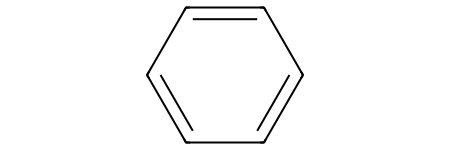

In [66]:
from rdkit import Chem

from rdsl.select import select_molecule

toluene = Chem.MolFromSmiles("Cc1ccccc1")
# All broken bonds have implicit hydrogens added to satisfy valence
select_molecule(toluene, "ring", broken_bonds="hydrogens").mol

In [67]:
# All broken bonds are left as radicals
select_molecule(toluene, "ring", broken_bonds="radicals").mol

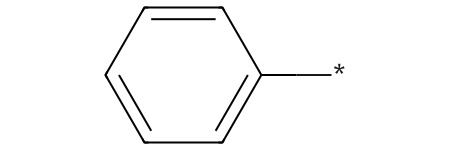

In [68]:
# Extract a fragment and keep it "wildcards" ([c]1ccccc1)
select_molecule(toluene, "ring", broken_bonds="wildcards").mol

In [69]:
# You can optionally return a mapping between the new atom IDs to the original atom IDs of the query molecule
result = select_molecule(toluene, "ring")

type(result)

rdsl.select.core.SelectionResult

In [70]:
# Mapping from new to old atom IDs
result.atom_mapping

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}

In [71]:
# Mapping from new to old bond IDs
result.bond_mapping

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6}

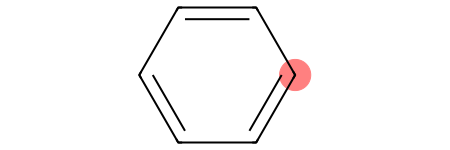

In [72]:
# New atom ID
highlight_atoms(result.mol, atom_ids=[0])

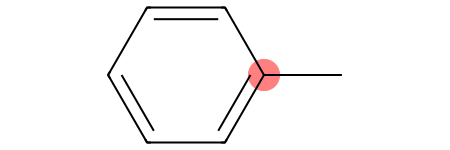

In [73]:
# Maps to old atom ID
highlight_atoms(toluene, atom_ids=[1])